---

# Actividad Modulo 2
Yose Miguel Sotomayor Carneado A0150908

---

## Importamos librerias necesarias

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.datasets import load_breast_cancer

from NNMultiClass import NNMultiClass, train_test_split_stratified, transform_standardizer, fit_standardizer

%matplotlib inline

---

## Data

In [2]:
data = load_breast_cancer()

X = data.data
y = data.target

In [3]:
df = pd.DataFrame(X, y, columns=data.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


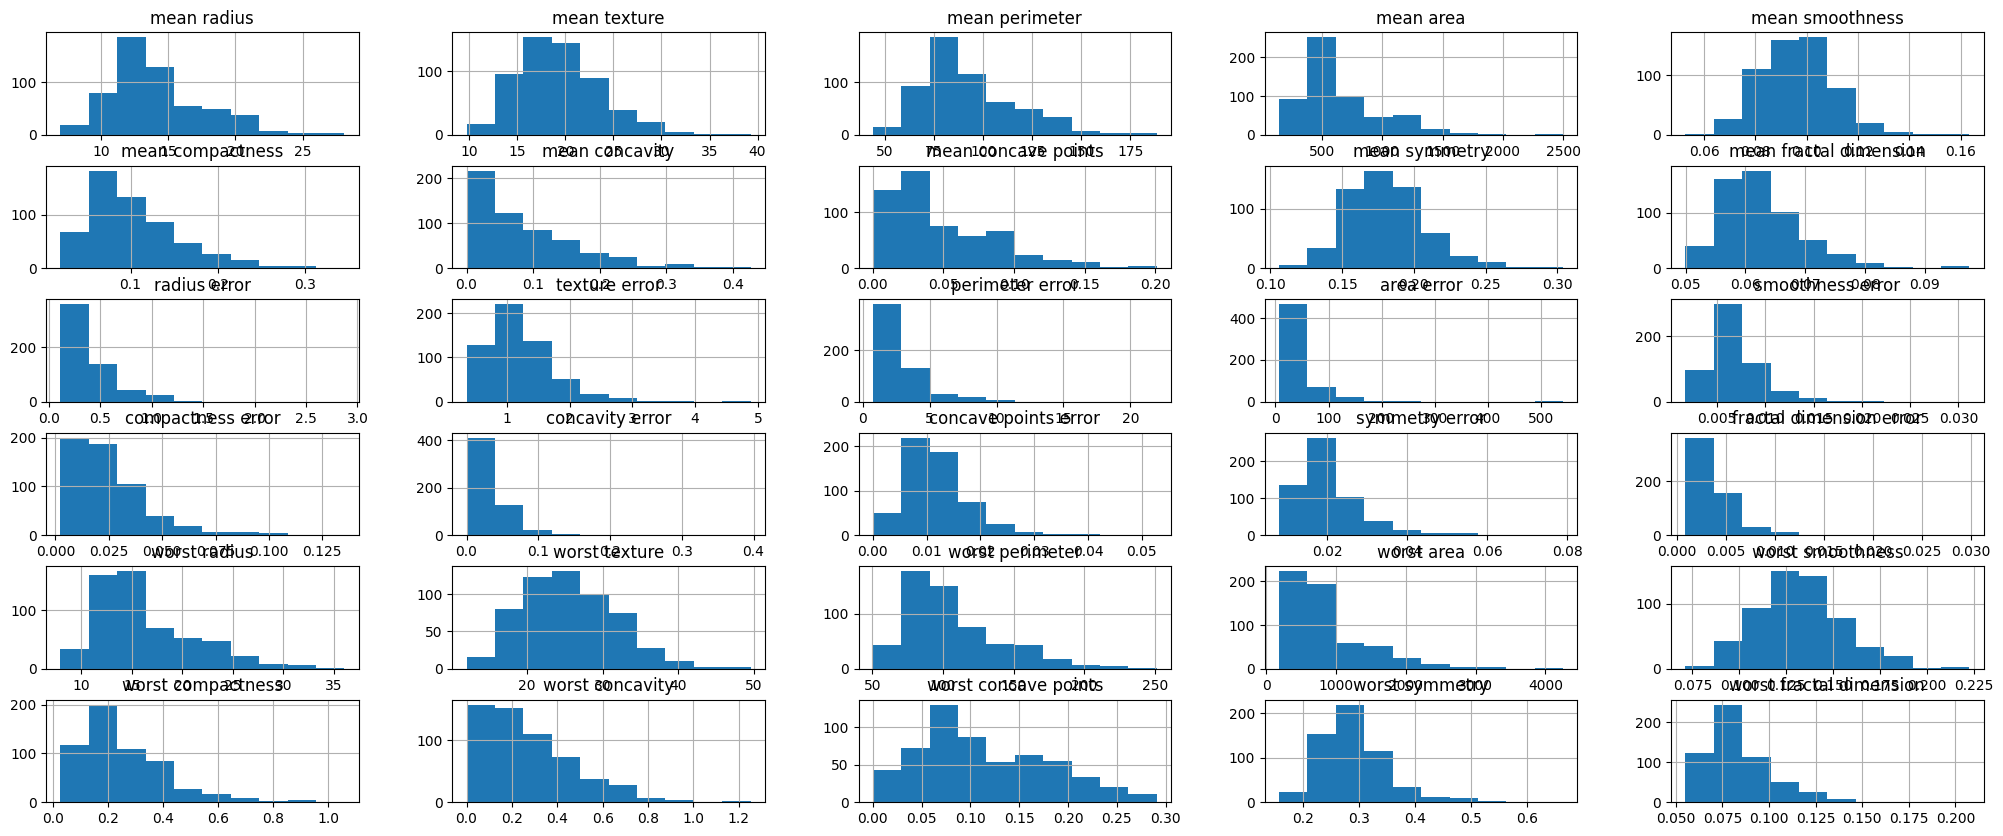

In [4]:
df.hist(figsize=(25, 10))
plt.show()

vemos que las distribuciones son bastante validas, y no hay inconsistencia en los datos.

---

### Train-Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split_stratified(X, y, test_size=0.2, seed=42)

---

### Scale the data

se escalan los datos para que la red neuronal no tenga problemas con numeros grandes

In [6]:
X_test_scaled  = transform_standardizer(X_test, *fit_standardizer(X_train))
X_train_scaled = transform_standardizer(X_train, *fit_standardizer(X_train))

---

## Neural Network Configuration

In [7]:
input_size = X_test_scaled.shape[1]
output_size = len(np.unique(y))
layers = 64

layer_sizes = [input_size] + [layers] + [output_size]

nn = NNMultiClass(layer_sizes=layer_sizes, hidden_activation="relu", seed=42, lr=3e-1)
nn.show_weights()
y_pred = nn.predict(X_test_scaled)


Pesos capa 0 (30 → 64):
[[ 0.07867761 -0.26852274  0.19376567 ... -0.08646694  0.04202266
   0.15136196]
 [ 0.18363791  0.20484138 -0.09004043 ...  0.09214371  0.37782318
  -0.3069373 ]
 [-0.16518314 -0.23924088 -0.10064846 ...  0.42626776  0.44504858
  -0.04635166]
 ...
 [ 0.0189196   0.00968846 -0.02346277 ...  0.2622049  -0.4281804
  -0.00204094]
 [ 0.0707058  -0.07765708 -0.47822613 ...  0.17353917  0.12267754
  -0.17865651]
 [-0.0435457   0.26949339  0.10156947 ...  0.26474372 -0.08192308
  -0.37856759]]

Pesos capa 1 (64 → 2):
[[-0.13671713  0.12836322]
 [-0.24018807  0.14112389]
 [-0.00688776 -0.14904942]
 [-0.07288938 -0.12715304]
 [ 0.10827815  0.09155348]
 [-0.21489514 -0.05044901]
 [-0.10789821  0.16168875]
 [-0.16876239  0.20052864]
 [-0.00416184 -0.1452418 ]
 [-0.08465927 -0.10020236]
 [-0.1593273   0.01185336]
 [-0.15348944 -0.27254578]
 [-0.04745956 -0.22535702]
 [-0.09402011 -0.11363786]
 [-0.10890201  0.25012039]
 [ 0.00705145  0.03067138]
 [-0.22204979 -0.08174539]
 

---

## Pre - Backpropagation Prediction

---

### Confusion Matrix

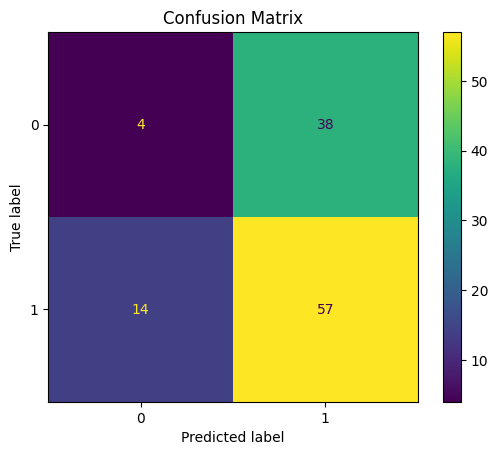

In [8]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()

---

### Classification Report

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.22      0.10      0.13        42
           1       0.60      0.80      0.69        71

    accuracy                           0.54       113
   macro avg       0.41      0.45      0.41       113
weighted avg       0.46      0.54      0.48       113



Al tener la red neuronal con pesos aleatorios, nos damos cuenta que el modelo es muy malo, no acertando en nada excepto en el caso del recall para cuando si hay cancer.

---

## Post - Backpropagation Prediction

In [10]:
nn.fit(X_train_scaled, y_train, epochs=100, verbose=True, batch_size=12)
nn.show_weights()
y_pred_back = nn.predict(X_test_scaled)

Epoch    1 | loss=0.0713 | acc=0.9803
Epoch   10 | loss=0.0123 | acc=0.9978
Epoch   20 | loss=0.0048 | acc=1.0000
Epoch   30 | loss=0.0029 | acc=1.0000
Epoch   40 | loss=0.0019 | acc=1.0000
Epoch   50 | loss=0.0014 | acc=1.0000
Epoch   60 | loss=0.0011 | acc=1.0000
Epoch   70 | loss=0.0009 | acc=1.0000
Epoch   80 | loss=0.0007 | acc=1.0000
Epoch   90 | loss=0.0006 | acc=1.0000
Epoch  100 | loss=0.0005 | acc=1.0000

Pesos capa 0 (30 → 64):
[[ 0.09074961 -0.24098516  0.13553595 ... -0.0613129  -0.03745759
   0.09756743]
 [ 0.03410754  0.29900602 -0.09667927 ... -0.01440715  0.26307393
  -0.33419019]
 [-0.1766248  -0.20381714 -0.15558219 ...  0.45462999  0.3653635
  -0.09648496]
 ...
 [-0.09593206 -0.11044386  0.00146113 ...  0.37531249 -0.34248521
   0.02536405]
 [ 0.02411899 -0.22248568 -0.45683954 ...  0.24269757  0.19750282
  -0.11376357]
 [-0.47781273  0.33676065  0.16218958 ...  0.33579695  0.03829683
  -0.33015523]]

Pesos capa 1 (64 → 2):
[[-0.62677805  0.61842414]
 [-0.4480348   

---

### Confusion Matrix

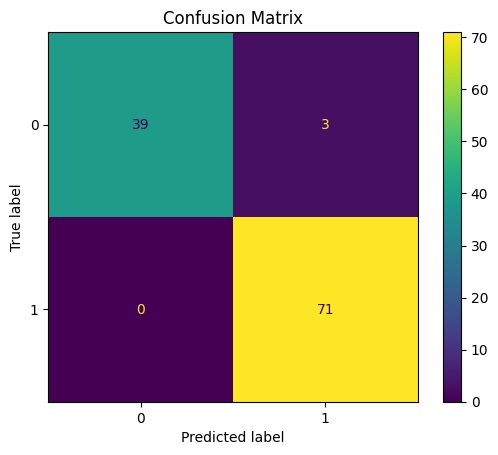

In [11]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_back)
plt.title("Confusion Matrix")
plt.show()

---

### Classification Report

In [12]:
print(classification_report(y_test, y_pred_back))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        42
           1       0.96      1.00      0.98        71

    accuracy                           0.97       113
   macro avg       0.98      0.96      0.97       113
weighted avg       0.97      0.97      0.97       113



Al aplicar el algoritmo de backpropagation observamos que el modelo funciona muy bien, dandonos resultados consistentes y válidos, dandonos a entender que el modelo aprendio bien los datos y se comporta bien con los datos de prueba.

---

# Conclusiones

En resumen, el trabajo realizado permitió consolidar aprendizajes clave, demostrar avances técnicos y prácticos, y fortalecer la capacidad de análisis y adaptación. 

Aunque se identificaron áreas de mejora que servirán de guía para el perfeccionamiento futuro, se cuenta ya con una base sólida que permitirá afrontar con mayor claridad y seguridad los retos de las siguientes etapas.

---